<a href="https://colab.research.google.com/github/shelfertmurphy/FromScratchML/blob/main/PCAfromscratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis

Principal Component Analysis (PCA) is a method of dimensionality reduction in data, which is particularly useful when working with data that takes the form of images. Below we implement PCA from scratch to reduce the resolution of a given image. The main idea here is that we are finding the features of an image that are "most important" for the image composition. That is, we want to blur the image while maintaining a high level of the integrity of the image. In our example below, this means we can still see that the image is of a photographer taking a photo, but the finer details are sacrificed. 

We do this through Singular Value Decomposition. Computing the SVD gives us the singular values of a matrix, which in turn correspond to those features of the image that are "most important."


(256, 256)
256


Text(0.5, 1.0, 'Matrix $X$ image encoding a Grayscale Image\n(Rank, $r=$256)')

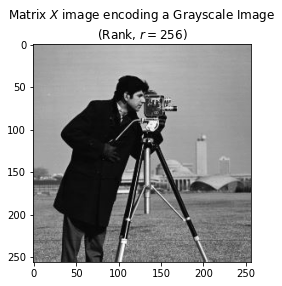

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

img = plt.imread('https://github.com/yexf308/MAT592/blob/main/homework/HW1/cameraman.png?raw=true')
# First turn the image into a matrix 
# encode RGBa image as matrix of intensities, X
R = img[::, ::, 0]
G = img[::, ::, 1]
B = img[::, ::, 2] 
X_image = 0.2989 * R + 0.5870 * G + 0.1140 * B
X_rank = np.linalg.matrix_rank(X_image, 0.)

# basic information
print(X_image.shape)
print(X_rank)

# Then, let's look at this image in grayscale. 
plt.imshow(X_image, cmap='gray')
plt.title(f"Matrix $X$ image encoding a Grayscale Image\n(Rank, $r=${X_rank})")

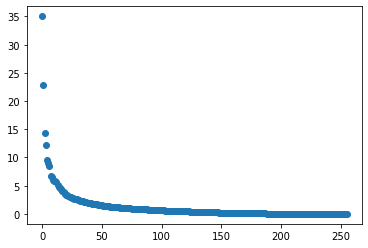

In [ ]:
#subtract mean to make sure matrix X has mean zero
X_mean = np.mean(X_image, axis=0)
X_image = X_image - X_mean

#compute SVD
u, s, vh = np.linalg.svd(X_image, full_matrices=False)

#plot singular values
plt.scatter(np.arange(X_image.shape[1]),s)



0.03131103515625
0.0626220703125
0.125244140625


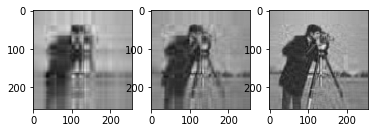

In [ ]:
d = 4
#use PCA to get new X
X4 = np.dot(u[:,:d]*s[:d], vh[:d, :]) + X_mean
X8 = np.dot(u[:,:(2*d)]*s[:(2*d)], vh[:(2*d), :]) + X_mean
X16 = np.dot(u[:,:(4*d)]*s[:(4*d)], vh[:(4*d), :]) + X_mean


#plot
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(X4, cmap = 'gray')
ax2.imshow(X8, cmap = 'gray')
ax3.imshow(X16, cmap = 'gray')

# Define a function to compute the compression rate from PCA/SVD
def compression_rate(rank,X):
  n,m=X.shape
  CR=((m*rank)+(rank)+(rank*n))/(n*m)
  return CR

print(compression_rate(d, X_image))
print(compression_rate(2*d, X_image))
print(compression_rate(4*d, X_image))